TODO:
* znaleźć takie cząsteczki, dla których wszystkie metody miały MCC=0 (lub mniejsze niż jakiś próg). Potraktować je jako outliers.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
!ls /data/2d-rna/validation-all-non0/results.rpt

/data/2d-rna/validation-all-non0/results.rpt


In [8]:
! ls /data/2d-rna

1.txt		 diff.py		    SPOT-RNA2
2d-rna-analysis  fasta1000		    SPOT-RNA2_features
2.txt		 fasta500		    SPOT-RNA2_outputs
7z2107		 fasta600		    test
all		 fasta600-1800		    tmp
all500.fasta	 fasta-cifs		    u-cifs
all.txt		 ipknot			    validation-all
a.txt		 new-cifs		    validation-all-non0
bar-all.png	 predictions-bpseqs	    validation-canon
box-all.png	 predictions-raw	    validation-canon-non0
b.txt		 predictions-rna-structure  validation-noncanon
canon.txt	 pseudoknots-bpseqs	    validation-noncanon-non0
cifs		 results		    validation-pseudoknots
cifs-awk	 rnapdbee-cifs		    validation-results
cifs-mini	 rna-structure-bpseqs	    violin-all.png
clean-non0.sh	 rna-struct-validation
dbn-cifs	 seq500


## Load results

In [9]:
res_path = "/data/2d-rna/validation-all-non0/results.rpt"
out_path = "all"

In [12]:
%load_ext autoreload
import os
from rna2d.utils import get_results


res_all = get_results("/data/2d-rna/validation-all-non0/results.rpt")
res_wc = get_results("/data/2d-rna/validation-canon-non0/results.rpt")
res_nwc = get_results("/data/2d-rna/validation-noncanon-non0/results.rpt")
res_pk = get_results( "/data/2d-rna/validation-pseudoknots/results.rpt")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


` :/data/2d-rna/cifs$ ls | sed 's/.cif//g' | awk '{ print toupper($0) }' | sort | uniq | wc -l`<br>
`12728` tyle jest unikalnych nazw w cząsteczek ignorując wielkoś znaków

`11733` tyle jest rekordów dla narzędzi w pliku wynikowym. Brakujące mogą wynikać z niezgodności sekwencji. <br>
TODO: 
Z pipeline usunąc "^^" i puścić jeszcze raz (toupper). Nazwy plików są poprawne.

### Filter results

Common subset

In [13]:
from rna2d.utils import get_subset_ids

all_ids = get_subset_ids(res_all)
wc_ids = get_subset_ids(res_wc)
nwc_ids = get_subset_ids(res_nwc)
pk_ids = get_subset_ids(res_pk)



In [14]:
%autoreload
from rna2d.utils import filter_common

common_all = filter_common(all_ids)
common_wc = filter_common(wc_ids)
common_nwc = filter_common(nwc_ids)
common_pk = filter_common(pk_ids)


In [15]:
with open("common-all.txt", 'w') as f:
    f.writelines(str(common_all))

Na tych czasteczkach puscic pomiar czasu. Czas - wall time <br>
Wykluczyć wszystkie cząsteczki, które w targecie nie mają żadnej pary.(3 kolumna ma tylko 0 / Nie ma żadnej wartości większej niż 0)

Collect results for methods

In [16]:
from rna2d.utils import collect_results

all_methods_results, all_indeces = collect_results(res_all, common_all, all_ids)
wc_methods_results, wc_indeces = collect_results(res_wc, common_wc, wc_ids)
nwc_methods_results, nwc_indeces = collect_results(res_nwc, common_nwc, nwc_ids)
pk_methods_results, pk_indeces = collect_results(res_pk, common_pk, pk_ids)

for m, v in all_methods_results.items():
    print(m, len(v))

contextFold 7354
contrafold 7354
e2efold 7354
mxfold 7354
mxfold2 7354
rna-state-inf 7354
spot-rna 7354
ipknot 7354
rnafold 7354
rna-structure 7354
ufold 7354


In [17]:
df = pd.DataFrame(all_methods_results['spot-rna'], columns=['PPV', 'TPR', 'F1', 'INF'], index=all_indeces['spot-rna'])
df.loc[df['INF']==0].head(100).tail()
# df.head()

,PPV,TPR,F1,INF
3AGV_1_S,0.0,0.0,0.0,0.0
3AGV_1_U,0.0,0.0,0.0,0.0
3BOY_1_D,0.0,0.0,0.0,0.0
3DD2_1_B,0.0,0.0,0.0,0.0
3DKN_1_D-E,0.0,0.0,0.0,0.0


In [18]:
%autoreload
from rna2d.utils import get_means_stds

all_means, all_stds, all_dfs = get_means_stds(all_methods_results, all_indeces, out_path='../results/all')
wc_means, wc_stds, wc_dfs = get_means_stds(wc_methods_results, wc_indeces, out_path='../results/canon')
nwc_means, nwc_stds, nwc_dfs = get_means_stds(nwc_methods_results, nwc_indeces, out_path='../results/noncanon')
pk_means, pk_stds, pk_dfs = get_means_stds(pk_methods_results, pk_indeces, out_path='../results/pseudoknots')

In [19]:
import numpy as np
print(np.std(all_dfs['ufold']["INF"].values))
print(np.mean(all_dfs['ufold']["INF"].values))

0.2616651103994729
0.6575358988305684


## Summary

In [20]:
%autoreload
from rna2d.utils import get_DataFrames

all_dfmeans, all_dfstds = get_DataFrames(all_means, all_stds, out_path="../results/all", name='all')
wc_dfmeans, wc_dfstds = get_DataFrames(wc_means, wc_stds, out_path="../results/canon", name='wc')
nwc_dfmeans, nwc_dfstds = get_DataFrames(nwc_means, nwc_stds, out_path="../results/noncanon", name='nwc')
pk_dfmeans, pk_dfstds = get_DataFrames(pk_means, pk_stds, out_path="../results/pseudoknots", name='pk')

### Seaborn bar of means

In [52]:
%autoreload 2
from rna2d.utils import get_sns_data, get_names
from rna2d.visualization import get_type_colors
colors = get_type_colors()
order = [
    'contextFold',
    'contrafold',
    'mxfold',
    'e2efold',
    'mxfold2',
    'rna-state-inf',
    'spot-rna',
    'ufold',
    'ipknot',
    'rnafold',
    'rna-structure'
    ]

all_sns = get_sns_data(all_dfs, all_dfmeans, get_names(), order=order, colors_dict=colors)
wc_sns = get_sns_data(wc_dfs, wc_dfmeans, get_names(), order=order, colors_dict=colors)
nwc_sns = get_sns_data(nwc_dfs, nwc_dfmeans, get_names(), order=order, colors_dict=colors)
pk_sns = get_sns_data(pk_dfs, pk_dfmeans, get_names(), order=order, colors_dict=colors)


## Seaborn violin plot

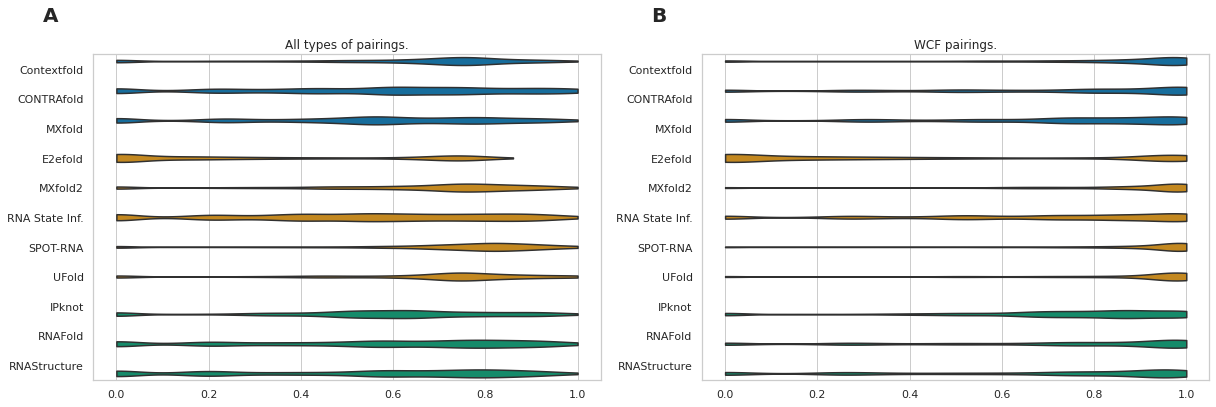

In [53]:
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
# plt.figure(figsize=(15,7))
# sns.set_theme(style="whitegrid")

def violinplot(sns_df, df_means, axs, panel_id: str,  title, y_left=True, x_axis=True):
    ax = sns.violinplot(x='INF', y='Method', inner=None, hue='Color', data=sns_df, ax=axs, cut=0, palette="colorblind")
    ax.set(title=title)
    ax.set_ylabel("")
    if not y_left:
        ax.set_ylabel("")
        ax.set_yticklabels("")
    if not x_axis:
        ax.set_xlabel("")
    ax.text(-0.1, 1.1, panel_id, transform=ax.transAxes, 
            size=20, weight='bold')
    ax.legend_.remove()
    # ax.set_yticklabels(ax.get_yticklabels(), rotation = 30)        
    # axR = ax.twinx() 
    # axR.yaxis.grid(False)#, linestyle='', which='major', color='grey', alpha=.25)
    # pos = np.arange(len(ax.get_yticks()))
    # axR.set_yticks(pos)
    # axR.set_yticklabels(df_means['INF'])
    # axR.set_ylim(ax.get_ylim())
    # axR.set_ylabel("Mean INF")


violinplot(all_sns, all_dfmeans, axs[0], "A", "All types of pairings.", x_axis=False)
violinplot(wc_sns, wc_dfmeans, axs[1],"B", "WCF pairings.", y_left=True, x_axis=False)
# violinplot(nwc_sns, nwc_dfmeans, axs[1][0], "Non-WCF pairings.", y_left=True, x_axis=True)
# violinplot(pk_sns, pk_dfmeans, axs[1][1], "Pseudoknots pairings.", y_left=True, x_axis=True